# 1 data pre-processing

## feature 1 - max-abs scaling

the data is sparse, with most values at or near zero
there are a few large positive and negative outliers.

max-abs scaling would preserve the zero values and the relative magnitudes of the outliers, while scaling all values to a [-1, 1] range.

this method maintains the sparsity of the data, which could be important for certain machine learning algorithms.

## feature 2 - standard scaling

the data appears to have a roughly normal distribution around zero.
there's a wide range of values, but no extreme outliers compared to feature 1.

standard scaling will center the data around zero and scale it to unit variance, which is appropriate for normally distributed data to maintain its overall structure.

# 2 learning from data

## 2.1 data generation

the initial data generation (in listing 1) uses random number generation for both x values and epsilon values. this means each time you run the code, you get a slightly different dataset.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

n_samples = 100

X = np.random.rand(n_samples, 1) * 10

epsilon = np.random.normal(0, 15, n_samples)

Y = 3 + 2 * X + epsilon[:, np.newaxis]

## 2.2 data visualization

in listing 2, the train_test_split function uses a random state (r=np.random.randint(104)) to split the data. this random state changes with each run, resulting in different data points being assigned to the training and testing sets each time.

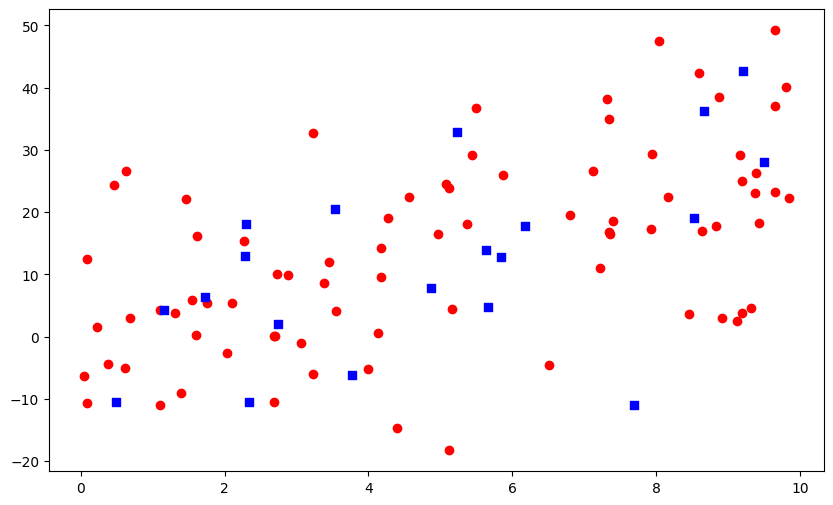

In [5]:
r = np.random.randint(104)
# data is split into training and testing data randomly each time
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=r)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, alpha=1, marker="o", color="red", label="training data")
plt.scatter(X_test, Y_test, alpha=1, marker="s", color="blue", label="testing data")
plt.show()

## 2.3 linear regression

the linear regression model differs from one instance to another because:

Each iteration uses a different random split of the data into training and testing sets (due to the random_state=np.random.randint(104) in the train_test_split function).
The underlying data generation process includes random noise (epsilon), which affects the Y values differently in each run.
With different training data in each iteration, the model learns slightly different parameters (slope and intercept) to best fit that particular subset of data.

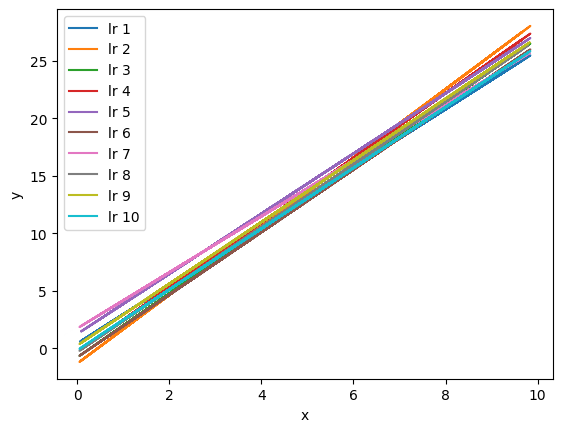

In [6]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=np.random.randint(104)
    )
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    plt.plot(X_train, Y_pred_train, label=f"lr {i+1}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## 2.4 increasing the number of samples
The reason for this different behavior is that larger sample sizes provide more information about the underlying data distribution and reduce the impact of random fluctuations. This leads to more stable and accurate models that are less sensitive to the particular subset of data used for training. In statistical terms, we say that the estimates become more efficient and consistent as the sample size increases

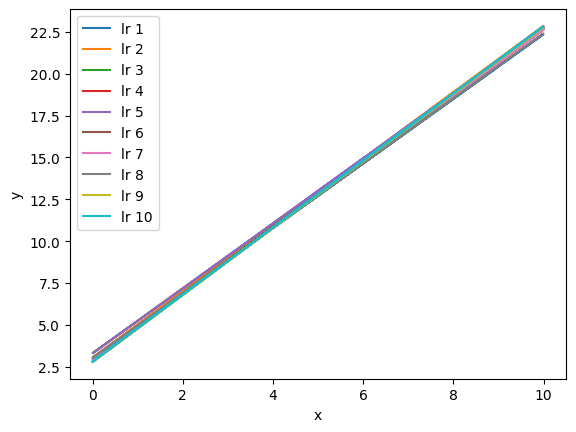

In [7]:
n_samples_2 = 10000

X_2 = np.random.rand(n_samples_2, 1) * 10

epsilon_2 = np.random.normal(0, 15, n_samples_2)

Y_2 = 3 + 2 * X_2 + epsilon_2[:, np.newaxis]

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X_2, Y_2, test_size=0.2, random_state=np.random.randint(104)
    )
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    plt.plot(X_train, Y_pred_train, label=f"lr {i+1}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# 3 linear regression on real world data

## 3.1 load dataset

In [45]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

infrared_thermography_temperature = fetch_ucirepo(id=925)

X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets

print(infrared_thermography_temperature.metadata)

print(infrared_thermography_temperature.variables)

{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

In [9]:
# type(infrared_thermography_temperature.data)
# convert to pandas dataframe
# pd.DataFrame.from_dict(infrared_thermography_temperature.data)
# infrared_thermography_temperature.data.head()

## 3.2
how many independent variables and dependent variables are there in the data set?

the dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings.

independent variables (features): 33 - consist of gender, age, ethnicity, ambient temperature, humidity, distance, and other temperature readings from the thermal images.

dependent variables (targets): 2 - aveOralF and aveOralM (oral temperature measured in fast mode and monitor mode, respectively).

## 3.3
Is it possible to apply linear regression on this dataset? If not, what steps would you follow before applying linear regression?

We cannot directly apply linear regression to this dataset without some preprocessing steps. Categorical variables should be addressed before applying linear regression. Convert categorical variables like Gender, Age, and Ethnicity into numerical format using techniques like one-hot encoding or label encoding. We can also consider averaging the the range of values for each category to create a numerical representation. We can also not use them in the regression model if they are not relevant to the prediction.

Optional Enhancements:

2. Feature scaling: Normalize or standardize the numerical features to ensure they are on the same scale, which can improve the performance of linear regression.

3. Feature selection: Choose relevant features that are likely to have a strong correlation with the target variable. This step is already mentioned in the question (selecting Age and four other features).

4. Handle multicollinearity: Check for highly correlated independent variables and consider removing or combining them to reduce multicollinearity.

5. Check for linearity: Verify the assumption of linearity between independent variables and the dependent variable. If necessary, apply transformations to achieve linearity.

## 3.4
Code given in is used to remove NaN/missing values. Is this a correct approach? If not correct it.

The approach is not appropriate because it handles X and Y separately, which can lead to misalignment of data points. It is better to remove rows with missing values from both X and Y to maintain the correspondence between input features and target values.

In [36]:
# the following implementation of data cleaning is wrong
# X = X.dropna()
# y = y.dropna()

# corrected implementation
# drop rows with missing values from both X and y at the same time
data = pd.concat([X, y], axis=1)
data_cleaned = data.dropna()
X = data_cleaned[X.columns]
X.info()
y = data_cleaned[y.columns]
y.info()
# data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 0 to 1019
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1018 non-null   object 
 1   Age          1018 non-null   object 
 2   Ethnicity    1018 non-null   object 
 3   T_atm        1018 non-null   float64
 4   Humidity     1018 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1018 non-null   float64
 7   Max1R13_1    1018 non-null   float64
 8   Max1L13_1    1018 non-null   float64
 9   aveAllR13_1  1018 non-null   float64
 10  aveAllL13_1  1018 non-null   float64
 11  T_RC1        1018 non-null   float64
 12  T_RC_Dry1    1018 non-null   float64
 13  T_RC_Wet1    1018 non-null   float64
 14  T_RC_Max1    1018 non-null   float64
 15  T_LC1        1018 non-null   float64
 16  T_LC_Dry1    1018 non-null   float64
 17  T_LC_Wet1    1018 non-null   float64
 18  T_LC_Max1    1018 non-null   float64
 19  RCC1       

## 3.5
Select "aveOralM" as the dependent feature. For the independent features, select ’Age’ and four other features based on your preference. 

In [38]:
features_of_interest = ["Age", "T_atm", "Humidity", "Distance", "T_Max1"]
X[features_of_interest].describe()

,T_atm,Humidity,Distance,T_Max1
count,1018.000000,1018.000000,1018.000000,1018.000000
mean,24.115815,28.749411,0.729784,36.084615
std,1.337617,13.070900,2.456486,0.492236
min,20.200000,9.900000,0.540000,34.892500
25%,23.400000,17.600000,0.600000,35.775000
50%,24.000000,26.300000,0.620000,36.027500
75%,24.700000,36.200000,0.700000,36.280000
max,29.100000,61.200000,79.000000,38.807500


In [40]:
# Assuming X and Y are already defined from the previous code
y = infrared_thermography_temperature.data.targets["aveOralM"]

# Select 'Age' and four other features
selected_features = ["Age", "T_atm", "Humidity", "Distance", "T_Max1"]
X = infrared_thermography_temperature.data.features[selected_features]


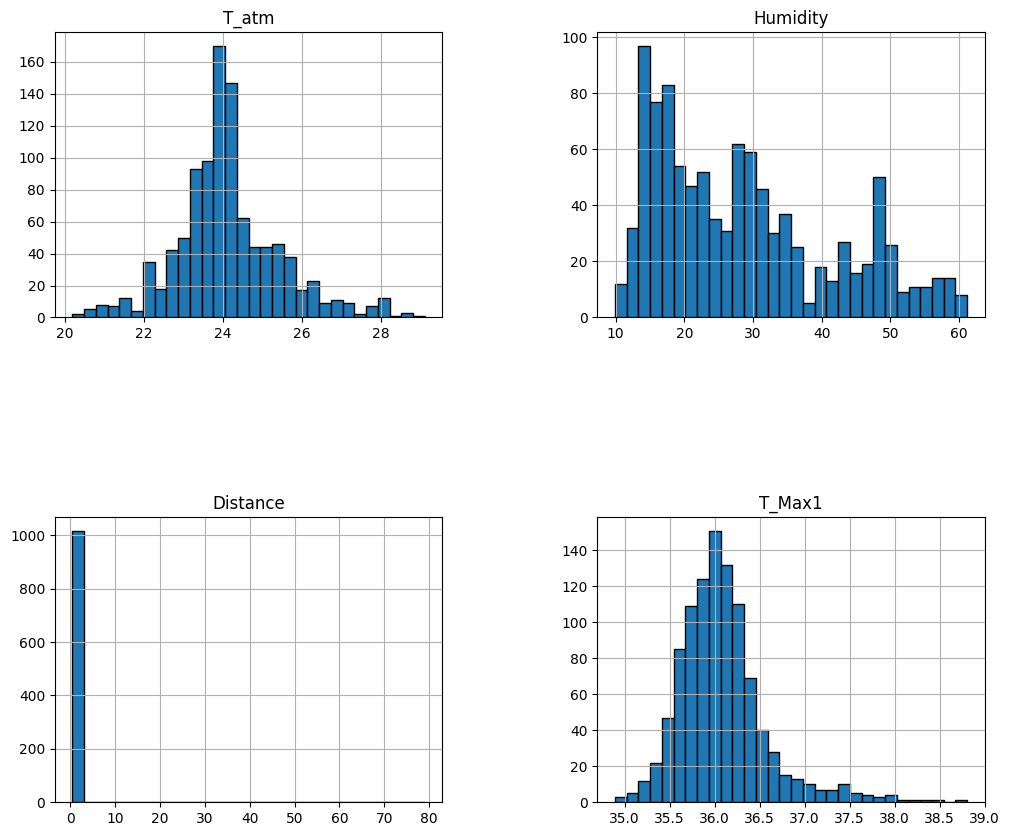

In [41]:
X.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

## 3.6
Split the data into training and testing sets with 80% of data points for training and 20% of data points for testing. 

In [ ]:
# r3 = np.random.randint(104)
r3 = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=r3
)


## 3.7
Train a linear regression model and estimate the coefficient corresponds to independent variables. List the estimated coefficients. 

In [53]:
from ucimlrepo import fetch_ucirepo

infrared_thermography_temperature = fetch_ucirepo(id=925)

X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets


import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


df = pd.concat([X, y], axis=1)
df = df.dropna()
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


def convert_age(age_range):
    """Converts the age range to a single average value"""
    if isinstance(age_range, str):
        if ">" in age_range:
            return int(age_range.replace(">", "").strip())
        lower, upper = map(int, age_range.split("-"))
        return np.mean([lower, upper])
    return age_range


selected_features = ["Age", "T_RC1", "T_atm", "Humidity", "Distance"]
X = X[selected_features]
X["Age"] = X["Age"].apply(convert_age)

# X["Gender"] = X["Gender"].map({"Male": 0, "Female": 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=np.random.randint(104)
)

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

print("Intercept:", linear_regression.intercept_)
print("Coefficients:", linear_regression.coef_)

coef = pd.DataFrame({"Feature": X.columns, "Coefficient": linear_regression.coef_})
print(coef)


Intercept: 12.916980107531447
Coefficients: [ 0.00171784  0.70848314 -0.05130626  0.00144639  0.00466418]
    Feature  Coefficient
0       Age     0.001718
1     T_RC1     0.708483
2     T_atm    -0.051306
3  Humidity     0.001446
4  Distance     0.004664


## 3.8
Which independent variable contributes highly for the dependent feature?

## 3.9 & 3.10

select ’T_OR1’, ’T_OR_Max1’, ’T_FHC_Max1’, ’T_FH_Max1’ features as independent features. Train a linear regression model and estimate the coefficient corresponds to independent variables. 

Calculations
1. Residual sum of squares (RSS)
2. Residual Standard Error (RSE)
3. Mean Squared Error (MSE)
4. R2 statistic
5. Standard error for each feature
6. t-statistic for each feature
7. p-value for each feature

In [50]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
infrared_thermography_temperature = fetch_ucirepo(id=925)

# data (as pandas dataframes)
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as SMl

df = pd.concat([X, y], axis=1)
df = df.dropna()
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

selected_features = ["T_OR1", "T_OR_Max1", "T_FHC_Max1", "T_FH_Max1"]
X = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=np.random.randint(104)
)

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

print("Intercept:", linear_regression.intercept_)
print("Coefficients:", linear_regression.coef_)

# Create a DataFrame to show feature names and their corresponding coefficients
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": linear_regression.coef_})

# Display the estimated coefficients
print(coef_df)


residual_sum_of_squares = np.sum((linear_regression.predict(X_test) - y_test) ** 2)
residual_standard_error = np.sqrt(
    residual_sum_of_squares / (X_test.shape[0] - X_test.shape[1] - 1)
)
mean_squared_error = np.mean((linear_regression.predict(X_test) - y_test) ** 2)
r_squared = linear_regression.score(X_test, y_test)

X_test_with_intercept = np.c_[np.ones(X_test.shape[0]), X_test]

XtX_inv = np.linalg.inv(X_test_with_intercept.T @ X_test_with_intercept)

standard_error_coefficients = np.sqrt(np.diag(residual_standard_error**2 * XtX_inv))

ols_model = SMl.OLS(y_test, X_test_with_intercept).fit()

summary = ols_model.summary()

t_values = ols_model.tvalues.values
p_values = ols_model.pvalues.values

print("Residual Sum of Squares:", residual_sum_of_squares)
print("Residual Standard Error:", residual_standard_error)
print("Mean Squared Error:", mean_squared_error)
print("R-squared:", r_squared)
print("Standard Error of Coefficients:", standard_error_coefficients)
print("T-values:", t_values)
print("P-values:", p_values)
print(summary)

Intercept: 6.951744716410143
Coefficients: [-0.06822707  0.63778992 -0.0485804   0.32087768]
      Feature  Coefficient
0       T_OR1    -0.068227
1   T_OR_Max1     0.637790
2  T_FHC_Max1    -0.048580
3   T_FH_Max1     0.320878
Residual Sum of Squares: 16.899745678887165
Residual Standard Error: 0.2914161030554695
Mean Squared Error: 0.08284189058278021
R-squared: 0.6539567827420465
Standard Error of Coefficients: [1.50052422 1.7984355  1.8019723  0.08401261 0.09292058]
T-values: [ 6.10397448  1.46398058 -1.20259961 -1.41208857  4.97493554]
P-values: [5.32124729e-09 1.44777108e-01 2.30560232e-01 1.59485704e-01
 1.40800696e-06]
                            OLS Regression Results                            
Dep. Variable:               aveOralM   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     101.5
Date:                Tue, 10 Sep 2024   Prob (F-s

## 3.11
Will you be able to discard any features based on p-value ? 

# 5 linear regression impact on outliers

## 5.3 choosing appropriate loss function


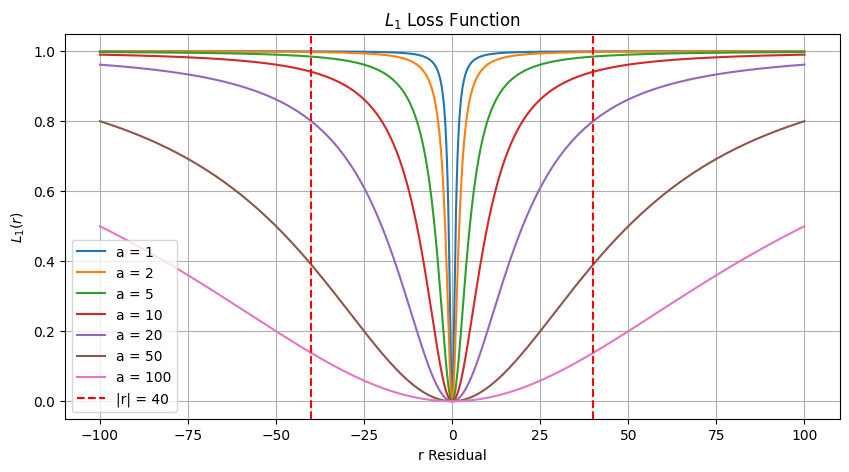

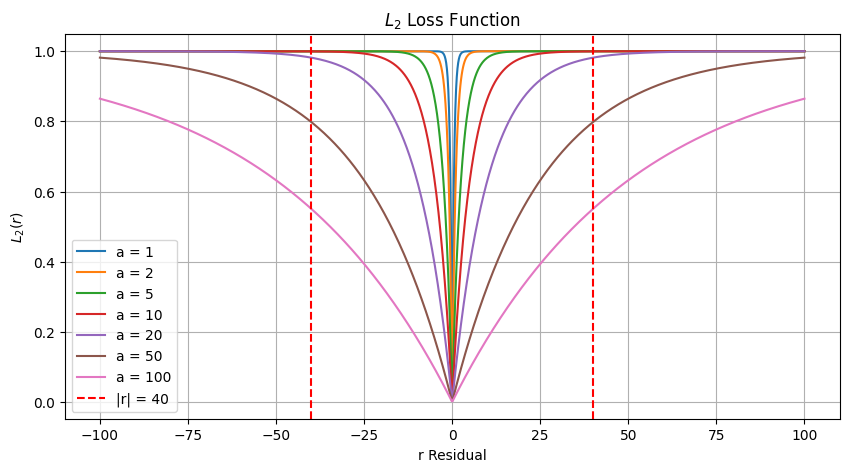

In [24]:
import numpy as np
import matplotlib.pyplot as plt


def L1(r, a):
    return r**2 / (a**2 + r**2)


def L2(r, a):
    return 1 - np.exp(-2 * np.abs(r) / a)


# Generate residual values
r = np.linspace(-100, 100, 1000)

# Define a values
a_values = [1, 2, 5, 10, 20, 50, 100]

# Plot L1
plt.figure(figsize=(10, 5))
for a in a_values:
    loss = L1(r, a)
    plt.plot(r, loss, label=f"a = {a}")
plt.axvline(x=40, color="r", linestyle="--", label="|r| = 40")
plt.axvline(x=-40, color="r", linestyle="--")
plt.xlabel("r Residual")
plt.ylabel("$L_1(r)$")
plt.title("$L_1$ Loss Function")
plt.legend()
plt.grid(True)
plt.show()

# Plot L2
plt.figure(figsize=(10, 5))
for a in a_values:
    loss = L2(r, a)
    plt.plot(r, loss, label=f"a = {a}")
plt.axvline(x=40, color="r", linestyle="--", label="|r| = 40")
plt.axvline(x=-40, color="r", linestyle="--")
plt.xlabel("r Residual")
plt.ylabel("$L_2(r)$")
plt.title("$L_2$ Loss Function")
plt.legend()
plt.grid(True)
plt.show()